#### Q-3. 
Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the
data and calculate the following

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

a. Measure the dispersion in both and interpret the results.

b. Calculate mean and 5% confidence interval and plot it in a graph

c. Calculate the Mean absolute deviation and Standard deviation and interpret
the results.

d. Calculate the correlation coefficient and check the significance of it at 1% level
of significance.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the data into a pandas DataFrame
data = pd.read_csv('data.csv')

In [2]:
data


,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [3]:
# Calculate dispersion
dispersion_before = data[' Blood Pressure Before (mmHg)'].max() - data[' Blood Pressure Before (mmHg)'].min()
dispersion_after = data[' Blood Pressure After (mmHg)'].max() - data[' Blood Pressure After (mmHg)'].min()


In [4]:
# Calculate mean and confidence interval
mean_before = data[' Blood Pressure Before (mmHg)'].mean()
std_before = data[' Blood Pressure Before (mmHg)'].std()
n_before = len(data[' Blood Pressure Before (mmHg)'])
conf_interval_before = (1.96 * std_before) / np.sqrt(n_before)  

In [5]:
# Calculate mean absolute deviation and standard deviation
mad_before = np.mean(np.abs(data[' Blood Pressure Before (mmHg)'] - mean_before))
std_before = data[' Blood Pressure Before (mmHg)'].std()

In [6]:
# Calculate correlation coefficient
corr_coef = data[' Blood Pressure Before (mmHg)'].corr(data[' Blood Pressure After (mmHg)'])

# Calculate t-value and p-value
n = len(data)
t_value = corr_coef * np.sqrt((n - 2) / (1 - corr_coef ** 2))  
p_value = 2 * (1 - stats.t.cdf(np.abs(t_value), n - 2))  

In [7]:
# Print the results
print("Dispersion in Blood Pressure Before:", dispersion_before)
print("Dispersion in Blood Pressure After:", dispersion_after)
print("Mean Before:", mean_before)
print("Confidence Interval Before:", mean_before - conf_interval_before, mean_before + conf_interval_before)
print("Mean Absolute Deviation (MAD) Before:", mad_before)
print("Standard Deviation (SD) Before:", std_before)
print("Correlation Coefficient:", corr_coef)
print("p-value:", p_value)


Dispersion in Blood Pressure Before: 28
Dispersion in Blood Pressure After: 23
Mean Before: 133.91
Confidence Interval Before: 132.6167375095941 135.2032624904059
Mean Absolute Deviation (MAD) Before: 5.7118
Standard Deviation (SD) Before: 6.598278012275075
Correlation Coefficient: 0.9779485966556016
p-value: 0.0


#### Q-4. 
A group of 20 friends decide to play a game in which they each write a number
between 1 and 20 on a slip of paper and put it into a hat. They then draw one slip of paper
at random. What is the probability that the number on the slip of paper is a perfect square
(i.e., 1, 4, 9, or 16)?

In [9]:
# There are 4 perfect squares 1,4,9,16
# Totally there are 20 slips
prob = 4/20
print('The probability that the number on the slip of paper is a perfect square is ',prob)

The probability that the number on the slip of paper is a perfect square is  0.2


#### Q-6. 
A pharmaceutical company is developing a drug that is supposed to reduce blood
pressure. They conduct a clinical trial with 100 patients and record their blood
pressure before and after taking the drug. 

The company wants to know if the changein blood pressure follows a normal distribution.

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

In [12]:
data = pd.read_csv('data.csv')
data['Change in Bp'] = data[' Blood Pressure After (mmHg)'] - data[' Blood Pressure Before (mmHg)']

<Axes: >

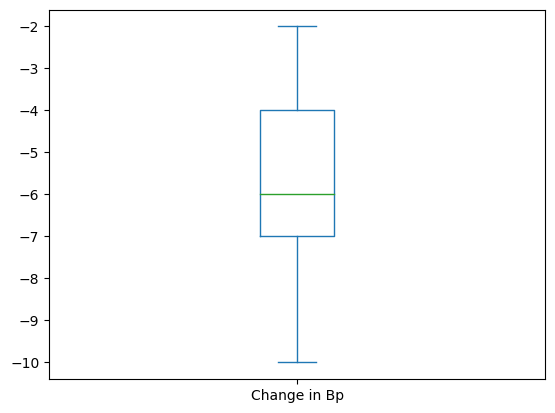

In [13]:
data['Change in Bp'].plot(kind = 'box')

In [14]:
from scipy import stats

skewness = stats.skew(data['Change in Bp'])
kurotisis = stats.kurtosis(data['Change in Bp'])
print(skewness)
print(kurotisis)
#skewness and kurotis are almost equal to zero hence the change in Bp may not follow Normal distribution

-0.19249414486106803
0.01014432784689756


#### Q-8. 
The anxiety levels of 10 participants were measured before and after a new therapy.
The scores are not normally distributed. Use the Wilcoxon signed-rank test to test whether
the therapy had a significant effect on anxiety levels. The data is given below: Participant
Before therapy After therapy Difference

Data is given in the question as Image So i have manually entered the data in the image 

In [15]:
# Import necessary modules
import numpy as np
from scipy.stats import wilcoxon

# Define the before and after therapy data
before_therapy = np.array([10,8,12,15,6,9,11,7,14,10])
after_therapy = np.array([7,6,10,12,5,8,9,6,12,8])

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(before_therapy, after_therapy)

print("Test statistic:", statistic)
print("P-value:", p_value)


Test statistic: 0.0
P-value: 0.001953125


#### Q-9. 
Given the score of students in multiple exams
Test the hypothesis that the mean scores of all the students are the same. If not, name the
student with the highest score.

Data is given in the question as Image So i have manually entered the data in the image

In [16]:
import numpy as np
from scipy.stats import f_oneway

# Create the dataset (5 students x 3 exams)
scores = np.array([[85, 90, 92],
                   [70, 80, 85],
                   [90, 85, 88],
                   [75, 70, 75],
                   [95, 92, 96]])

#Null Hypothesis:he mean scores are the same
#Alternate Hypothesis:he mean scores are not the same

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*scores.T)

# Set the significance level
alpha = 0.05

print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. The mean scores are not the same.")
    highest_score_student = np.argmax(np.mean(scores, axis=1))
    print("Student with the highest score:", highest_score_student)
else:
    print("Fail to reject the null hypothesis. The mean scores are the same.")


F-statistic: 0.3236947791164659
P-value: 0.7295954253321559
Fail to reject the null hypothesis. The mean scores are the same.


#### Q-11.
Given the data of a feature contributing to different classes

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

a. Check whether the distribution of all the classes are the same or not.

b. Check for the equality of variance/

c. Which amount LDA and QDA would perform better on this data for
classification and why.

d. Check the equality of mean for between all the classes.

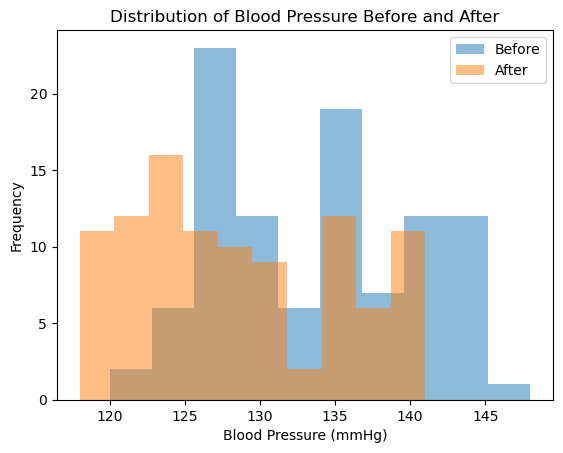

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
# Plot histograms
plt.hist(data[' Blood Pressure Before (mmHg)'], bins=10, alpha=0.5, label='Before')
plt.hist(data[' Blood Pressure After (mmHg)'], bins=10, alpha=0.5, label='After')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.title('Distribution of Blood Pressure Before and After')
plt.legend()
plt.show()


In [5]:
# the distribution of all the classes is not exactly same

In [7]:
from scipy.stats import levene

# Perform Levene's test for equality of variance
statistic, p_value = levene(data[' Blood Pressure Before (mmHg)'], data[' Blood Pressure After (mmHg)'])

alpha = 0.05

print("Levene's test statistic:", statistic)
print("P-value:", p_value)



Levene's test statistic: 0.18038002140150966
P-value: 0.6715080090945376


In [11]:
# Hence the p value is greater than alpha  reject the null hypothesis. Variances are significantly different.

In [9]:
from scipy.stats import ttest_ind

# Perform independent t-test
statistic, p_value = ttest_ind(data[' Blood Pressure Before (mmHg)'], data[' Blood Pressure After (mmHg)'])

alpha = 0.05

print("Independent t-test statistic:", statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. Means are significantly different.")
else:
    print("Fail to reject the null hypothesis. Means are not significantly different.")


Independent t-test statistic: 5.818552457956588
P-value: 2.3565868442709904e-08
Reject the null hypothesis. Means are significantly different.


In [10]:
# P value is greater than alpha Reject the null hypothesis. Means are significantly different.

#### Q-12. 
A pharmaceutical company develops a new drug and wants to compare its
effectiveness against a standard drug for treating a particular condition. They conduct a
study with two groups: Group A receives the new drug, and Group B receives the standard
drug. The company measures the improvement in a specific symptom for both groups after
a 4-week treatment period.

a. The company collects data from 30 patients in each group and calculates the
mean improvement score and the standard deviation of improvement for each
group. The mean improvement score for Group A is 2.5 with a standard
deviation of 0.8, while the mean improvement score for Group B is 2.2 with a
standard deviation of 0.6. Conduct a t-test to determine if there is a significant
difference in the mean improvement scores between the two groups. Use a
significance level of 0.05.

b. Based on the t-test results, state whether the null hypothesis should be
rejected or not. Provide a conclusion in the context of the study.

In [17]:
from scipy.stats import ttest_ind

group_A = [2.5] * 30  
group_B = [2.2] * 30  

# Perform the independent t-test
statistic, p_value = ttest_ind(group_A, group_B, equal_var=False)

alpha = 0.05

print("Independent t-test statistic:", statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean improvement scores between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean improvement scores between the two groups.")


Independent t-test statistic: 3637893932810941.5
P-value: 0.0
Reject the null hypothesis. There is a significant difference in mean improvement scores between the two groups.


C:\Users\Raja.Balasubramani\AppData\Local\Temp\ipykernel_5112\3853527196.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  statistic, p_value = ttest_ind(group_A, group_B, equal_var=False)
